# <font color="maroon"> Chapter 1: A brief introduction to detectors </font>

<a href="https://githubtocolab.com/alsinmr/pyDR_tutorial/blob/main/ColabNotebooks/Ch1_detectors_intro.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

## Models for decaying correlation functions
Experimental and simulated dynamics information is often assumed to be described based on a time-correlation function, which relates the state of some parameter at an initial time to its value at a later time. The time-correlation is the *average* of that relationship. For example, for some parameter which varies with time, $A(\tau)$, the simplest time-correlation function would be

$$
\begin{equation}
C(t)=\langle X(\tau)\cdot X(t+\tau)\rangle_\tau
\end{equation}
$$

where the brackets ($\langle\rangle_\tau$) indication an average over the initial time $\tau$.

Then, the time-function often decays in time, indicating that the value of $X(t+\tau)$ eventually becomes uncorrelated with its value at some earlier time, $X(\tau)$. A simple model for this behavior is to assume the correlation function has the form

$$
\begin{equation}
C(t)=\left(\langle X(t)^2\rangle_\tau-\langle X(t)\rangle_\tau^2\right)e^{-t/\tau_c}+\langle X(t)\rangle_\tau^2.
\end{equation}
$$

In this simple case, the correlation time, $\tau_c$, indicates how quickly the correlation decays. For motion, a shorter $\tau_c$ indicates a faster motion, and a longer $\tau_c$ indicates a slower motion. $\langle X(\tau)\rangle_\tau$ is simply the average of the parameter $X(\tau)$, and ($\langle X(t)^2\rangle_\tau-\langle X(t)\rangle_\tau^2$) is its variance (standard deviation squared)

It can be, however, that multiple motions affect the decorrelation, in which case the correlation function can be modeled more generally as

$$
\begin{equation}
C(t)=\langle X(t)\rangle_\tau^2+\sum\limits_i{A_i\exp(-t/\tau_i)}
\end{equation}
$$

In this case, the $A_i$ add up to the total variance ($\langle X(t)^2\rangle_\tau-\langle X(t)\rangle_\tau^2$), but each corresponds to a different correlation time, representing contributions from different motions with varying speeds. This expression suggests a number of discrete motions, but it is also possible to obtain a continuum of correlation times, in which case we would better represent the situation with an infinite number of amplitudes, given as an integral:

$$
\begin{equation}
C(t)=\langle X(t)\rangle_\tau^2+\int\limits_{-\infty}^\infty{\theta(z)\exp(-t/(10^z\cdot1\mathrm{ s})dz}
\end{equation}
$$

In this representation, $z$ is the log-correlation time ($z=\log_{10}(\tau_c/\mathrm{s})$), and $\theta(z)$ is the distribution of correlation times as a function of the log-correlation time. $\theta(z)$ must then integrate to the total variance.

## The angular correlation function for NMR
In NMR, a major source of relaxation is due to the stochastic reoriention of anisotropy interaction tensors, such as dipole couplings, chemical shift anisotropies (CSA), and quadrupole couplings. Then, we cannot use a strictly linear correlation function, but rather must use the rank-2 tensor correlation function (which can be constructed from a sum of linear correlation functions).

$$
\begin{equation}
C(t)=\left\langle\frac{3\cos^2\beta_{\tau,t+\tau}-1}{2}\right\rangle_\tau
\end{equation}
$$

Here, $\beta_{\tau,t+\tau}$ is the angle between the z-component of the relevant tensor at some time $\tau$ and a later time, $t+\tau$. For example, for a one-bond dipole coupling, this is just the angle between the bond between the two times $\tau$ and $t+\tau$.

Given the full correlation function, a given relaxation rate constant may be obtained by first calculating the spectral density function, $J(\omega)$, which is the Fourier transform of the correlation function

$$
\begin{equation}
J(\omega)=\frac25\int\limits_0^\infty{C(t)\exp(-i\omega t)dt}.
\end{equation}
$$

Then, for example, $T_1$ relaxation of a $^{13}$C nucleus due to a single bonded $^1$H and its CSA is given by

$$
\begin{equation}
R_1=\left(\frac{\delta_\mathrm{HC}}{4}\right)^2(J(\omega_\mathrm{H}-\omega_\mathrm{C})+3J(\omega_\mathrm{C})+6J(\omega_\mathrm{H}+\omega_\mathrm{C}))+\frac13(\omega_\mathrm{C}\Delta\sigma)^2J(\omega_\mathrm{C})
\end{equation}
$$

In this equation, $R_1$ is the longitudinal relaxation rate constant for $^{13}$C ($1/T_1=R_1$), with $\delta_\mathrm{HC}$ being the anisotropy of the dipole coupling and $\Delta\sigma_\mathrm{C}$ the width of the CSA in ppm. The $J(\omega)$ are sampled at the $^1$H and $^13$C Larmor frequencies in addition to their sums and differences (given in radians/s).

Usually, relaxation due to reorientational motion can be expressed as a sum over the spectral density sampled at various frequencies:

$$
\begin{equation}
R_\zeta=\sum\limits_i{a_iJ(\omega_i)}
\end{equation}.
$$

The models of the correlation function given above are still valid, but we typically write them as:

$$
\begin{eqnarray}
C(t)&=&S^2+(1-S^2)\sum\limits_i{A_i\exp(-t/\tau_i}) \\
&=&S^2+(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\exp(-t/(10^z\cdot\mathrm{ s}))dz}
\end{eqnarray}
$$

Here, $S^2$ is defined as:

$$
\begin{equation}
S^2=\lim_{t\rightarrow\infty}C(t)
\end{equation}
$$


## Fitting dynamics data
Whether we have NMR data, or other dynamics data depending on some form of time-correlation function, we can, in principle, fit the experimental data based on some model of the correlation function. However, the challenge is, if we don't know the model, how valuable are these fits? We'll start by taking some example motion, characterized by 3 motions and calculate a few relaxation rate constants for those motions.

In [1]:
# SETUP pyDR
import os
os.chdir('..')
import sys
sys.path.append('../') # Path to pyDR location

In [2]:
# Import various modules, including the pyDR module
import pyDR   #Import the pyDR software, which includes functions for calculating NMR relaxation rate constants
from pyDR.misc.tools import linear_ex #Convenient tool for interpolating between data points
import numpy as np #Lots of nice linear algebra tools
from scipy.optimize import minimize
import matplotlib.pyplot as plt #Plotting tools

#Zoomable plots with matplotlib notebook
# %matplotlib notebook

z=[-11,-9.5,-7.5]  #These are log-correlation times, corresponding to 10 ps, 1 ns, and 1 μs, respectively
A=[.2,.05,.01]  #These are the corresponding amplitudes. The total amplitude of motion is 0.38 (S^2=0.62)

nmr=pyDR.Sens.NMR()  #This is a container for NMR experiments, which give the relaxation rates as a function of z
nmr.new_exper(Type='R1',v0=[400,600,800],Nuc='15N') #Add 3 experiments: 15N T1 at 400, 600, and 800
#We assume by default N15 coupled to a single proton (22.954 kHz = 2*11.477) and CSA of 113 ppm (z-component)
nmr.new_exper(Type='R1p',v0=800,vr=60,v1=10,Nuc='15N') #Add an R1p (MAS=60 kHz, spin-lock at 10 kHz)
nmr.new_exper(Type='S2')
labels=[r'$R_1$(400 MHz)',r'$R_1$(600 MHz)',r'$R_1$(800 MHz)',
        r'$R_{1\rho}$',r'$1-S^2$']
ax=plt.subplots()[1]
nmr.plot_Rz(norm=True,ax=ax) #Plot the 9 relaxation rate constants (normalized to max of 1) vs tc
_=ax.legend(labels)

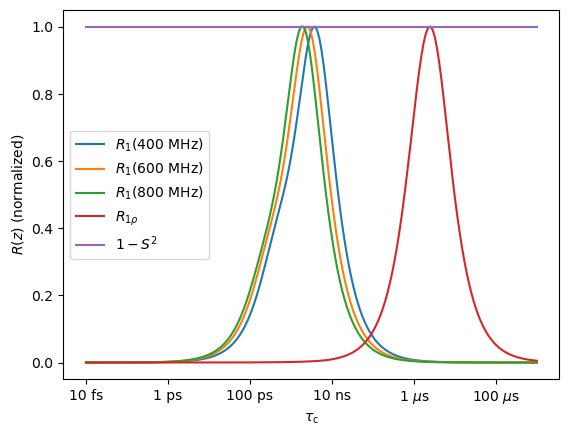

In [3]:
ax.figure

Now we can construct the relaxation rate constants for the seven experiments above, by simply summing over the three correlation times and amplitudes

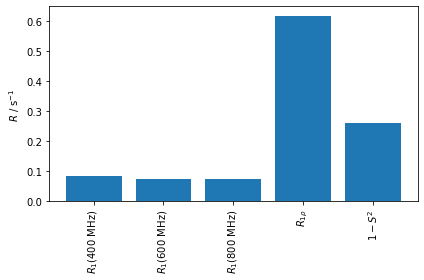

In [4]:
R=np.zeros(nmr.rhoz.shape[0])  #Pre-allocate an array with 7 relaxation rates
for z0,A0 in zip(z,A):    #Iterate over all correlation times, amplitudes
    R+=A0*linear_ex(nmr.z,nmr.rhoz,z0)

ax=plt.subplots()[1]
ax.bar(range(len(R)),R)
#Some figure cleanup/labeling
ax.set_xticks(range(len(R)))
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel(r'$R$ / s$^{-1}$')
ax.figure.tight_layout()

Now, the question is, can we fit this data based on a model of the correlation function, and does that model have to match the original model. For demonstration purposes, we try a model that only has two correlation times.

In [5]:
#Function to calculate relaxation rate constants
def calcR(z,A,nmr):
    R=np.zeros(nmr.rhoz.shape[0])
    for z0,A0 in zip(z,A):    #Iterate over all correlation times, amplitudes
        R+=A0*linear_ex(nmr.z,nmr.rhoz,z0)
    return R

#Function to calculate error of fit
def error(zf,Af):
    Ri=calcR(z,A,nmr)
    Rc=calcR(zf,Af,nmr)
    return np.sum((Ri-Rc)**2)

# Function to use with nonlinear minimization algorithm (needs to have just one argument)
def fun(x):
    zf=x[:len(x)//2]
    Af=x[len(x)//2:]
    return error(zf,Af)

First, we just try to fit with the original model, i.e. with a tri-exponential decay

$$
\begin{equation}
C(t)=1-(A_0+A_1+A_2)+A_0\exp(-t/\tau_0)+A_1\exp(-t/\tau_1)+A_2\exp(-t/\tau_2)
\end{equation}
$$


In [6]:
fit=minimize(fun,[-10,-9,-7,.2,.1,.05],bounds=([-14,-6],[-14,-6],[-14,-6],[0,1],[0,1],[0,1]))   
zf,Af=fit['x'][:3],fit['x'][3:]
Rc=calcR(zf,Af,nmr)

print(f'Error is {fit["fun"]} (should be small– otherwise adjust initial guess)')

Error is 6.5735314936268175e-06 (should be small– otherwise adjust initial guess)


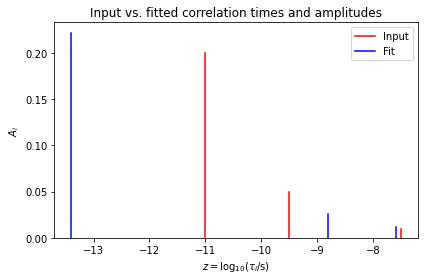

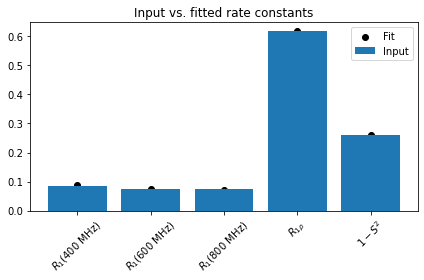

In [7]:
#Plot the results
ax=plt.subplots()[1]
for z0,A0 in zip(z,A):
    hdl0=ax.plot([z0,z0],[0,A0],color='red',label='Input' if z0==z[-1] else None)
for z0,A0 in zip(zf,Af):
    hdl1=ax.plot([z0,z0],[0,A0],color='blue',label='Fit' if z0==zf[-1] else None)
ax.set_ylim([0,ax.get_ylim()[1]])
ax.set_xlabel(r'$z=\log_{10}(\tau_i/\mathrm{s})$')
ax.set_ylabel(r'$A_i$')
ax.legend()
ax.set_title('Input vs. fitted correlation times and amplitudes')
ax.figure.tight_layout()

ax=plt.subplots()[1]
ax.bar(range(len(R)),R,label='Input')
ax.scatter(range(len(Rc)),Rc,color='black',marker='o',label='Fit')
ax.legend()
ax.set_xticks(range(len(Rc)))
ax.set_xticklabels(labels,rotation=45)
ax.set_title('Input vs. fitted rate constants')
ax.figure.tight_layout()

The data is well-fit, but the parameters themselves are not well determined, so we try again with a reduced number of variables, to see what happens.

In [8]:
fit=minimize(fun,[-10,-8.5,.2,.01],bounds=([-14,-6],[-14,-6],[0,1],[0,1]))   
zf,Af=fit['x'][:2],fit['x'][2:]
Rc=calcR(zf,Af,nmr)

print(f'Error is {fit["fun"]} (should be small– otherwise adjust initial guess)')

Error is 4.299449423051208e-07 (should be small– otherwise adjust initial guess)


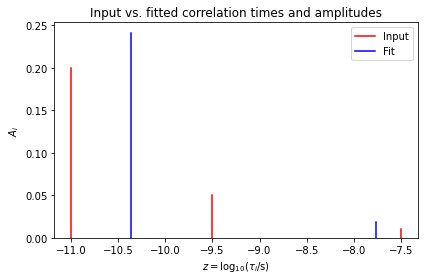

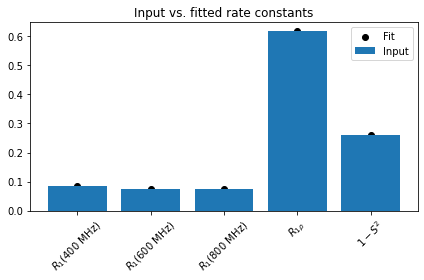

In [9]:
#Plot the results
ax=plt.subplots()[1]
for z0,A0 in zip(z,A):
    hdl0=ax.plot([z0,z0],[0,A0],color='red',label='Input' if z0==z[-1] else None)
for z0,A0 in zip(zf,Af):
    hdl1=ax.plot([z0,z0],[0,A0],color='blue',label='Fit' if z0==zf[-1] else None)
ax.set_ylim([0,ax.get_ylim()[1]])
ax.set_xlabel(r'$z=\log_{10}(\tau_i/\mathrm{s})$')
ax.set_ylabel(r'$A_i$')
ax.legend()
ax.set_title('Input vs. fitted correlation times and amplitudes')
ax.figure.tight_layout()

ax=plt.subplots()[1]
ax.bar(range(len(R)),R,label='Input')
ax.scatter(range(len(Rc)),Rc,color='black',marker='o',label='Fit')
ax.legend()
ax.set_xticks(range(len(Rc)))
ax.set_xticklabels(labels,rotation=45)
ax.set_title('Input vs. fitted rate constants')
ax.figure.tight_layout()

The two fits are nearly equal in quality, whereas only the second yields stable parameters, due to the fewer number of free variables. However, neither fit really reproduces the input correlation times and amplitudes. There isn't enough information to extract 6 parameters, and so we get parameters that represent some kind of compromise to match the real motion. This is discussed in detail in:

A. A. Smith, M. Ernst, B. H. Meier. [Because the light is better here: correlation-time analysis by NMR.](https://doi.org/10.1002/ange.201707316) Angew. Chem. Int. Ed. 2017, 56, 13778-13783. 

If it was just a matter of fitting three correlation times instead of two, we might be able to solve this problem by simply obtaining additional experimental data. However, the real problem is that we often have continua of correlation times (hence why we suggest using a distribution of correlation times above, $(1-S^2)\theta(z)$. Without a model of the correlation function that both accurately describes the motion and has sufficiently few parameters, we fail to be able to get really meaningful dynamics parameters. Furthermore, for proteins, which have a complex structure, it is highly non-trivial to get a good model.

To address this problem, we have developed the **detector** analysis, which we introduce here.

## Basic detector theory
Suppose that our correlation function is given by an arbitrarily complex sum of decaying exponential terms. We'll take this to be the rank-2 tensor correlation function used in NMR (here, that just means we assume an initial value of one, and value at $t=\infty$ of $S^2$). Then, this can be written as a distribution of correlation times

$$
\begin{equation}
C(t)=S^2+(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\exp(-t/(10^z\cdot\mathrm{1 s}))dz}
\end{equation}
$$

The distribution, $(1-S^2)\theta(z)$, can be assumed to be a sum of $\delta$-functions, allowing it to also be re-written as a sum of correlation times:

$$
\begin{equation}
C(t)=S^2+(1-S^2)\sum\limits_i{A_i\exp(-t/\tau_i)}
\end{equation}
$$

Then, a given relaxation rate constant is given by

$$
\begin{equation}
R_\zeta^{(\theta,S)}=\sum\limits_i{a_\zeta^iJ^{(\theta,S)}(\omega_i)}
\end{equation}
$$

The spectral density, $J^{(\theta,S)}(\omega)$ is, indeed, a function of the distribution of correlation times, given by

$$
\begin{equation}
J^{(\theta,S)}(\omega)=2(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\frac{10^z\cdot\mathrm{1 s}}{1+(\omega\cdot10^z\cdot\mathrm{1 s})^2}dz}
\end{equation}
$$

Then, a given relaxation rate constant can be written as a function of the distribution of correlation times:

$$
\begin{eqnarray}
R_\zeta^{(\theta,S)}&=&\sum\limits_i{a_\zeta^iJ^{(\theta,S)}(\omega_i)} \\
&=&\sum\limits_i{a_\zeta^i2(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\frac{10^z\cdot\mathrm{1 s}}{1+(\omega_i\cdot10^z\cdot\mathrm{1 s})^2}}dz}\\
&=&(1-S^2)\int\limits_{-\infty}^\infty{2\sum\limits_i{a_\zeta^i\frac{10^z\cdot\mathrm{1 s}}{1+(\omega_i\cdot10^z\cdot\mathrm{1 s})^2}}dz}\\
&=&(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)R_\zeta(z)dz}
\end{eqnarray}
$$

where

$$
\begin{equation}
R_\zeta(z)=2\sum\limits_i{a_\zeta^i\frac{10^z\cdot\mathrm{1 s}}{1+(\omega_i\cdot10^z\cdot\mathrm{1 s})^2}}
\end{equation}
$$

While the math may seem a bit overwhelming at first, all we've really done is a little shuffling of terms. We point out that a given relaxation rate constant is sensitive to certain correlation times more than others, and its measurement basically provides us a 'window', given by $R_\zeta(z)$, into the total dynamics. We have termed this window a *detector sensitivity*, which looks at only a certain range of correlation times, as defined by the integral above. pyDR automatically calculates these windows, as shown below, for a $^{15}$N $T_1$ (protein backbone) acquired at 600 MHz.

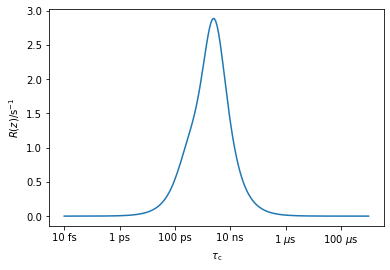

In [10]:
_=pyDR.Sens.NMR(Type='R1',Nuc='15N',v0=600).plot_Rz()

As one sees, measurement of this $T_1$ lets us characterize dynamics *around* roughly 1 ns. 

Interestingly, if we have multiple relaxation rate constants, we may add them together to get new windows. For example, we define:

$$
\begin{eqnarray}
\rho_n^{(\theta,S)}&=&\sum\limits_\zeta{b_\zeta^n R_\zeta^{(\theta,S)}} \\
&=&\sum\limits_\zeta{b_\zeta^n(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)R_\zeta(z)dz}} \\
&=&(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\sum\limits_\zeta{b_\zeta^n R_\zeta(z)}dz}\\
&=&(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\rho_n(z)dz}
\end{eqnarray}
$$

with

$$
\begin{equation}
\rho_n(z)=\sum\limits_\zeta{b_\zeta^n R_\zeta(z)}
\end{equation}
$$

The superscript $n$ just indicates that there are multiple possible linear combinations of relaxation rate constants. Each linear combination creates a new window, but most possible windows may not be particularly useful. For example, we take two relaxation rate constants below, and show a random set of linear combinations:

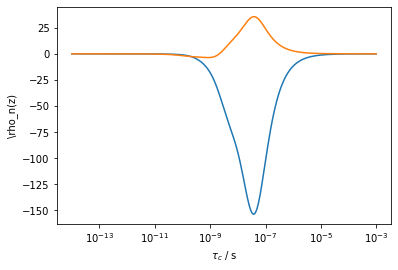

In [11]:
nmr=pyDR.Sens.NMR(Type='R1',v0=[40,800],Nuc='15N')
rho_0=nmr.rhoz[0]*10*(np.random.rand()-.5)+nmr.rhoz[1]*10*(np.random.rand()-.5)
rho_1=nmr.rhoz[0]*10*(np.random.rand()-.5)+nmr.rhoz[1]*10*(np.random.rand()-.5)
ax=plt.subplots()[1]
ax.semilogx(nmr.tc,rho_0)
ax.semilogx(nmr.tc,rho_1)
ax.set_xlabel(r'$\tau_c$ / s')
_=ax.set_ylabel(r'\rho_n(z)')

However, pyDR is designed to yield the optimal $n$ windows for a given data set, for example, for the two experiments, we get two optimized windows (The number of optimized windows is always less than or equal to the number of experiments)

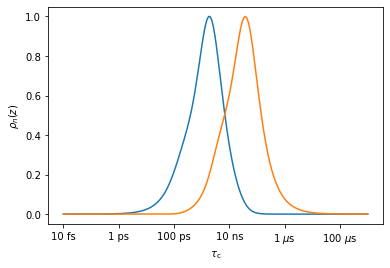

In [12]:
_=nmr.Detector().r_auto(2).plot_rhoz()

Formally, the linear combination of rate constants (or any other parameter depending linearly on the correlation function) is referred to as a *detector response* ($\rho_n^{(\theta,S)}$), and the linear combination of sensitivities of the rate constants as *detector sensitivities* ($\rho_n(z)$). In the next chapter, we discuss how the windows are actually optimized.